In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
pylab.rcParams['figure.figsize'] = (4.0, 2.)
pylab.rcParams['lines.linewidth'] = 1.0
pylab.rcParams['font.size'] = 12.0
pylab.rcParams['axes.linewidth'] = 1
pylab.rcParams['axes.titlesize'] = '14' 
pylab.rcParams['axes.labelsize'] = '10'
pylab.rcParams['axes.linewidth'] = 1
pylab.rcParams['figure.subplot.wspace'] = 0.5

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm
from sklearn import mixture
from sklearn.cluster import MeanShift
from sklearn.decomposition import PCA
import itertools
from scipy import linalg
import matplotlib as mpl
import h5py

from detect import detectData
from localisation import localisation, amps, filteredSpikes

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_path = '../rawDataSampleLarge.h5'
data = h5py.File(data_path, 'r')


In [3]:
# detectData(d, rawfilename, sfd, nDumpFrames, thres, maa = None, maxsl = None, minsl = None, ahpthr = None):

# MinAvgAmp minimal avg. amplitude of peak (in units of Qd)
# MaxSl dead time in frames after peak, used for further testing
# MinSl length considered for determining avg. spike amplitude
# AHPthr signal should go below that threshold within MaxSl-Slmin frames
# def detectData(data, spikefilename, shapefilename, sfd, thres, maa = None, maxsl = None, minsl = None, ahpthr = None):

# Matthias was using threshold 8
detectData(data_path, 'spikes', 'shapes', 30000, 11, maa=0, maxsl=12, minsl=3, ahpthr=0)
# detectData(data_path, 'spikes', 'shapes', 30000, 8)

(385, 1800000)
# Sampling rate: 30000
# Number of recorded channels: 385
# Analysing frames: 6000, Seconds:0.2
('Mean: ', 385.83544252236652)
('tCut: ', 11)
Analysing 5989 frames; 0 6000
(385, 6000)
Time taken for detection: 0:00:00.268154
Time per frame: 0:00:00.044692
Time per sample: 0:00:00.000116


(4603, 3)


<IPython.core.display.Javascript object>


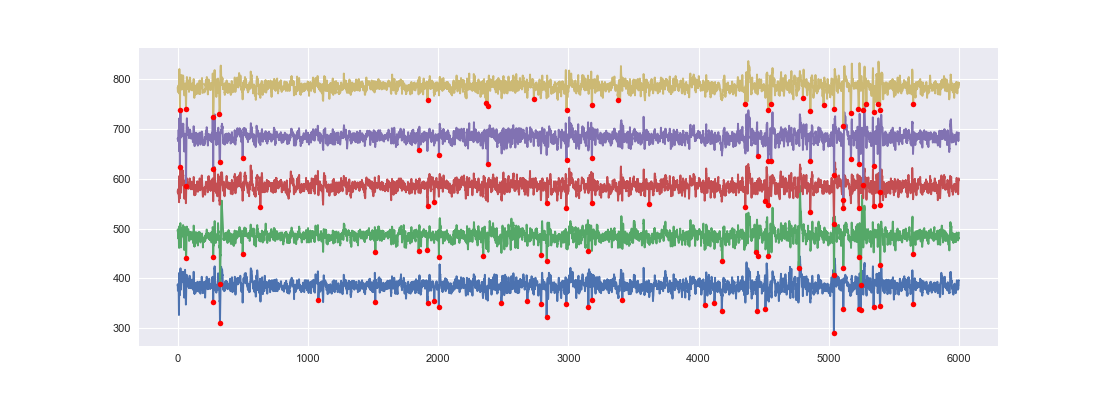

In [4]:
%matplotlib notebook
sp = np.loadtxt('spikes')
print(sp.shape)
plt.figure(figsize=(14,5))
for i, channel in enumerate(range(0,5)):
    d = data['Raw'][channel,:6000]
    plt.plot(d+i*100)
    inds = np.where(sp[:,0]==channel)[0]
    plt.plot(sp[inds,1], d[sp[inds,1].astype(int)]+i*100,'r.',ms=10)
# plt.xlim((187550,189250))

In [5]:
# plot individual shapes, remove baseline (now stored in shape file at position 4)

In [6]:
f = open('shapes')


In [20]:
l = f.readline()
line = l.split()
ch = int(line[0])
frame = int(line[1])
amp = int(line[2])
b = int(line[3])
cutout = np.array(line[4:], dtype=int)
ch, frame, amp, len(cutout)/10, b

(333, 42, 1008, 32.0, 385)

<IPython.core.display.Javascript object>


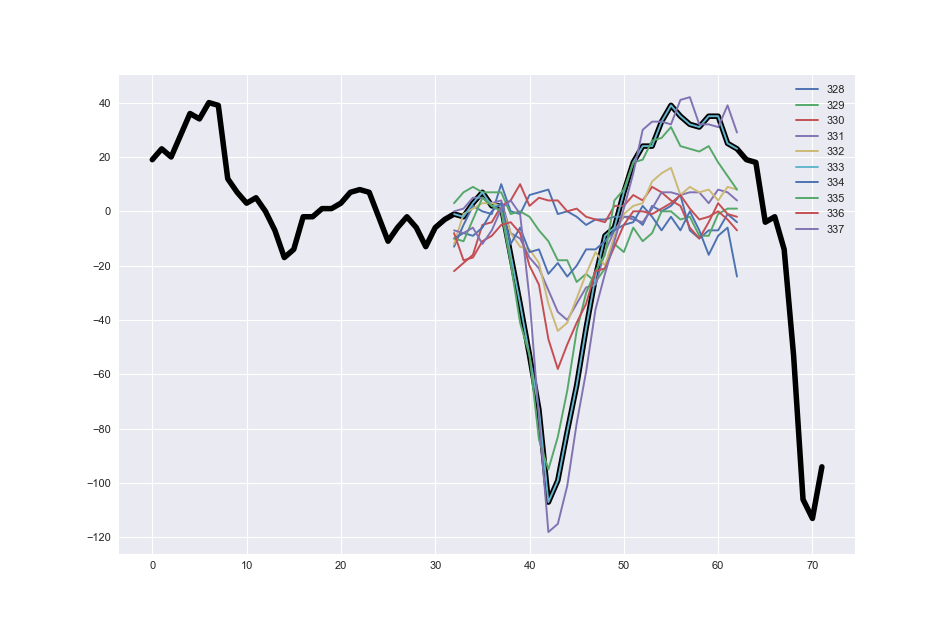

In [21]:
plt.figure(figsize=(12,8))
d = data['Raw'][ch,:6000]
plt.plot(d[:frame+30]-b, 'k', lw=5)
for i in range(int(len(cutout)/32)):
    plt.plot(np.arange(frame-10, frame+21), cutout[i*32+1:(i+1)*32]-b, label=cutout[i*32])
plt.legend()

In [6]:
filteredSpikes('shapes')

Number of filtered spikes = 672323


In [8]:
localisation('filtered_shapes','chpos.npy', medians = True, clen = 32)

[  0.    0.    2.   14.5   0.   35.    6.   28.5   0.    0. ]
[[ 59 120]
 [ 27 120]
 [ 43 140]
 [ 11 140]
 [ 59 160]
 [ 27 160]
 [ 43 180]
 [ 11 180]
 [ 59 200]
 [ 27 200]]
[  20.48837209  164.18604651]


In [7]:
ls = np.loadtxt('local_spikes')
ls.shape

(672323, 2)

<IPython.core.display.Javascript object>


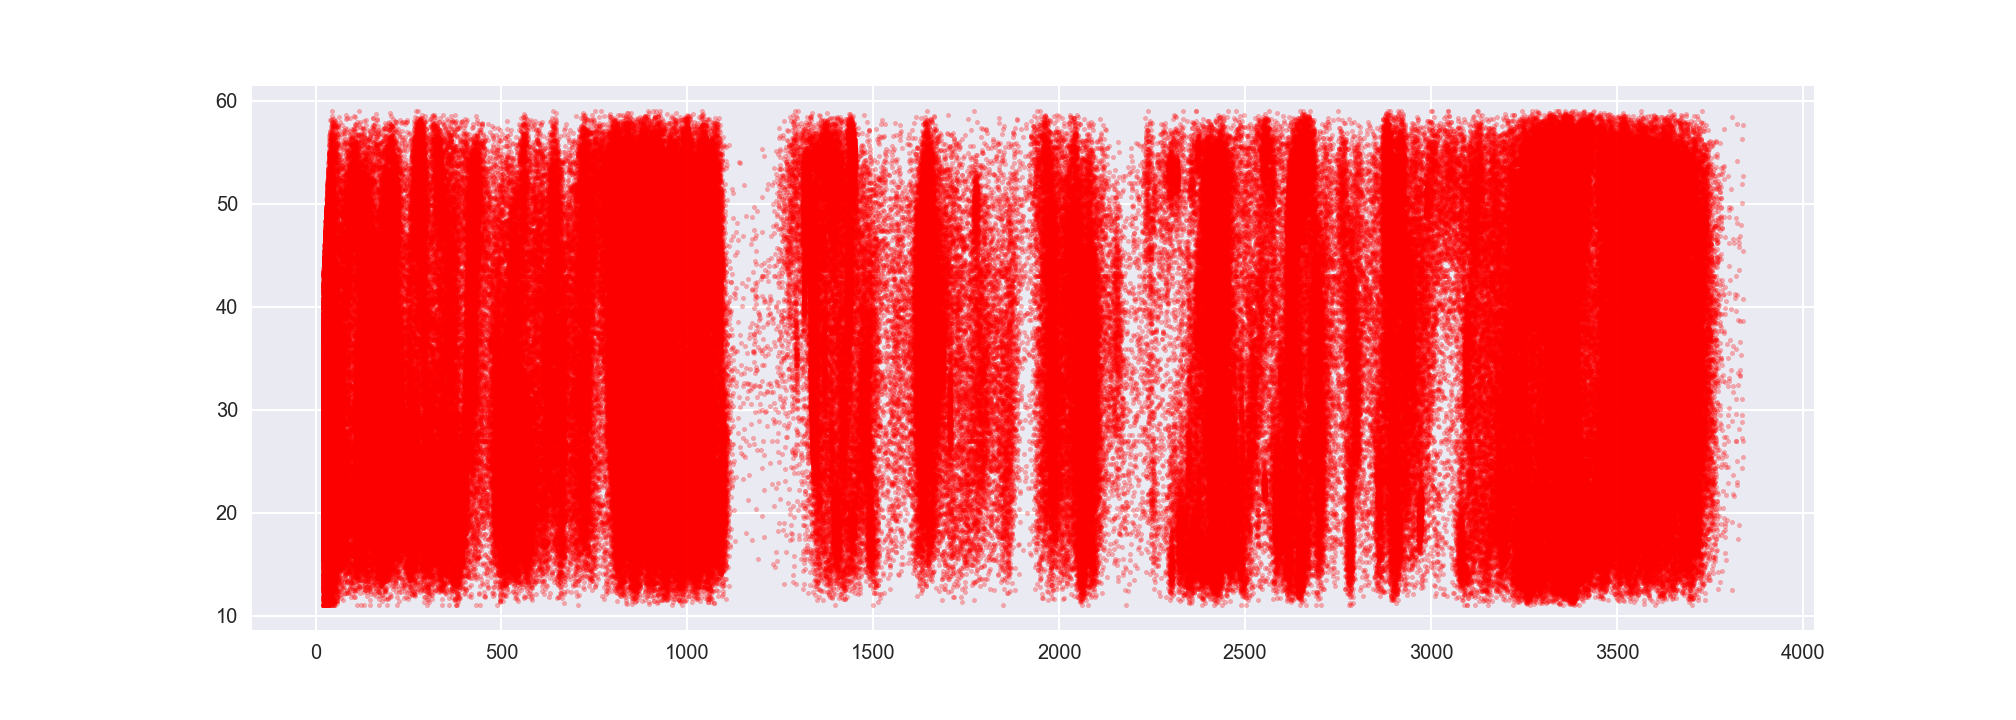

In [10]:
%matplotlib notebook
plt.figure(figsize=(14,5))
plt.plot(ls[:,0], ls[:,1],'r.',ms=5, alpha=0.3)

<IPython.core.display.Javascript object>


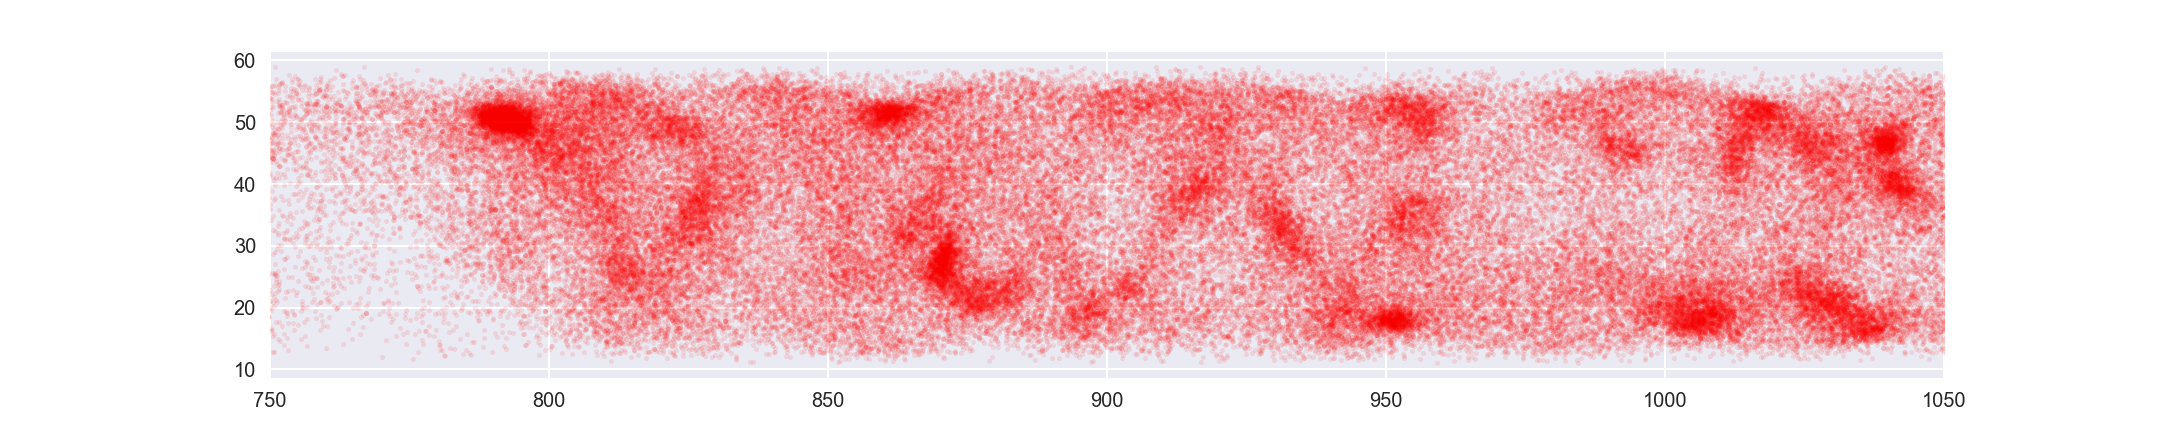

(750, 1050)

In [11]:
%matplotlib notebook
plt.figure(figsize=(15,3))
plt.plot(ls[:,0], ls[:,1],'r.',ms=5, alpha=0.1)
plt.xlim([750,1050])

<IPython.core.display.Javascript object>


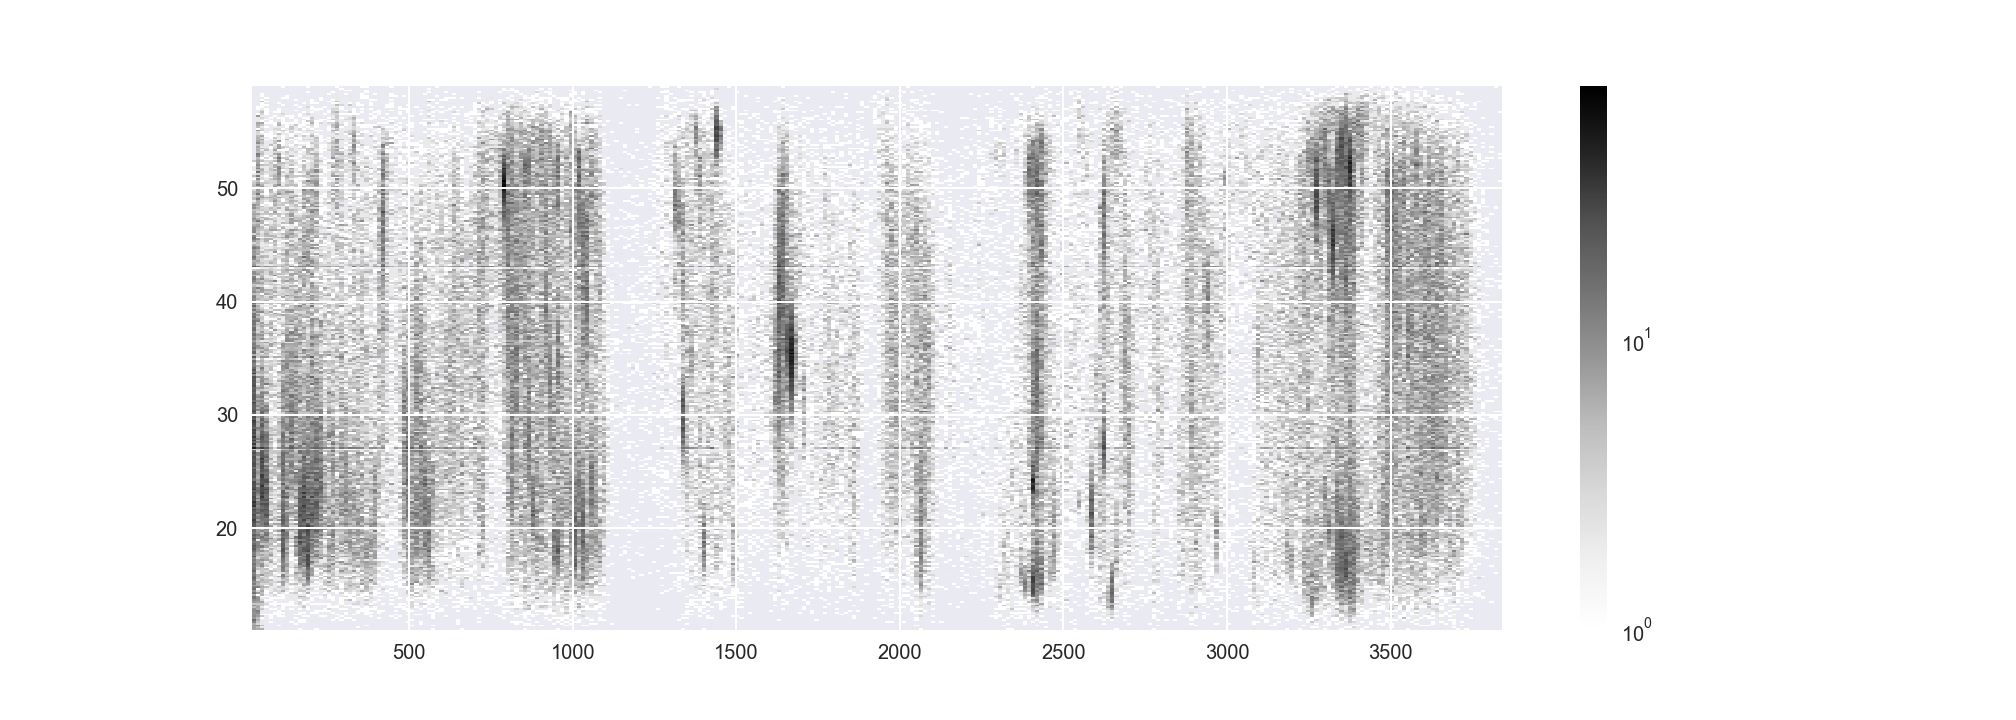

In [12]:
%matplotlib notebook
plt.figure(figsize=(14,5))
plt.hist2d(ls[:,0], ls[:,1], bins=300, norm=LogNorm())
plt.colorbar()

In [14]:
n = len(ls)

In [15]:
n

285770

<IPython.core.display.Javascript object>


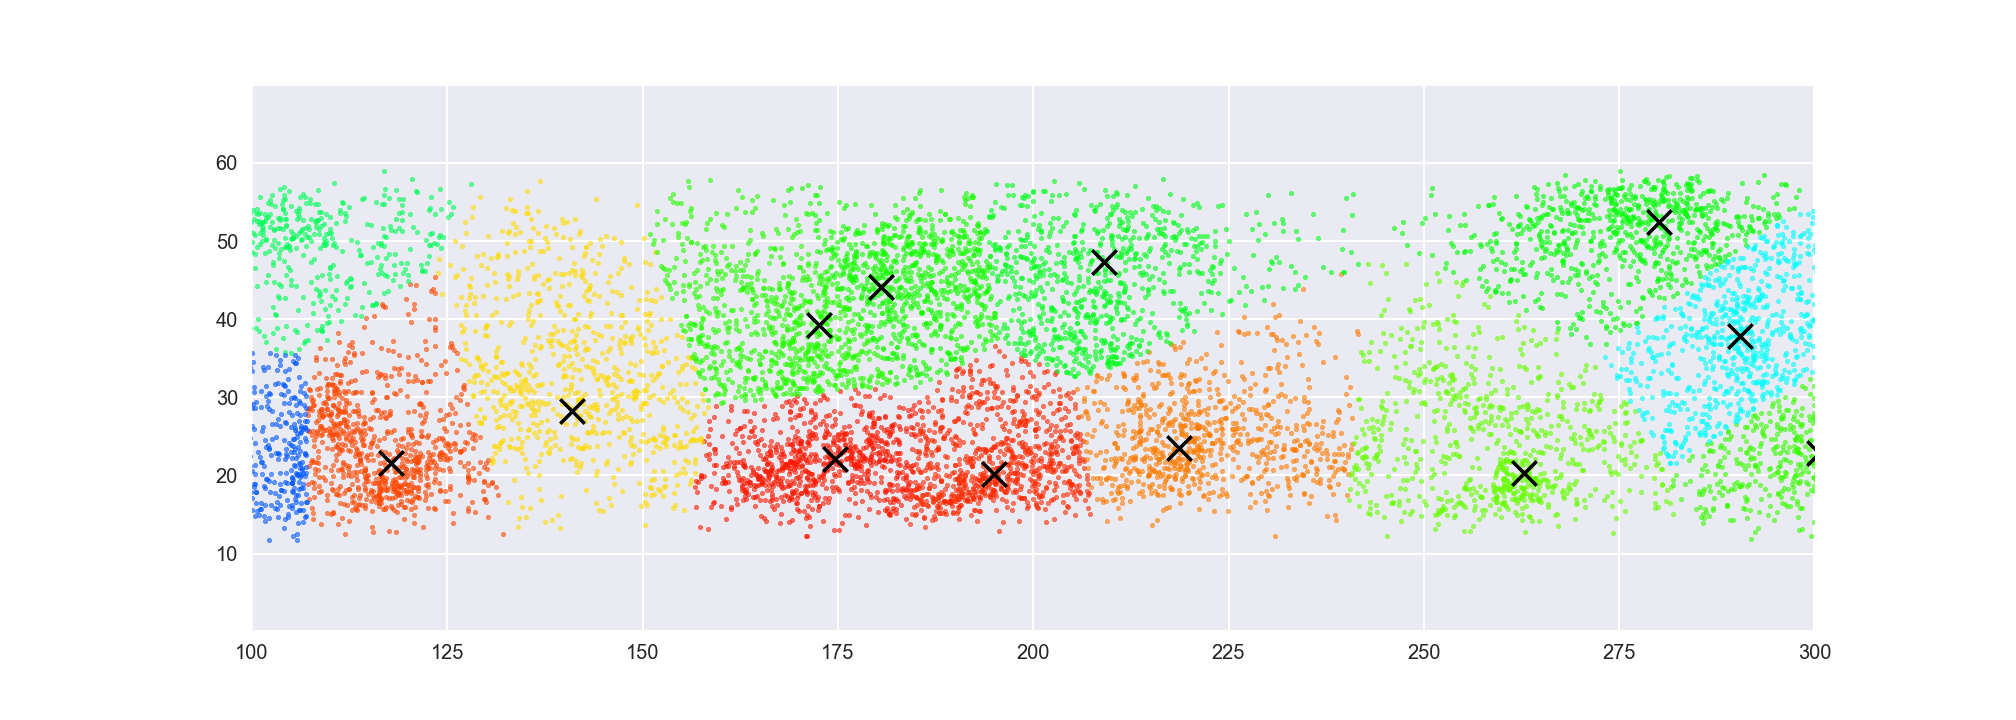

(100, 300)

In [12]:
plt.figure(figsize=(14,5))
# colors = 100*['r', 'g', 'b', 'c', 'k', 'y', 'm']
colors = plt.cm.hsv(1.*np.arange(n_clusters_)/n_clusters_)

for cl in np.unique(labels):
    inds = np.where(labels==cl)[0][:800]
    plt.scatter(ls[inds,0], ls[inds,1], marker='.', color = colors[cl],s=20, alpha=0.6)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="x", color ='k', s=150, linewidths = 5, zorder=10)
plt.axis('equal')
plt.xlim((100,300))


In [3]:
cutouts = np.loadtxt('pca_cutouts')

<IPython.core.display.Javascript object>


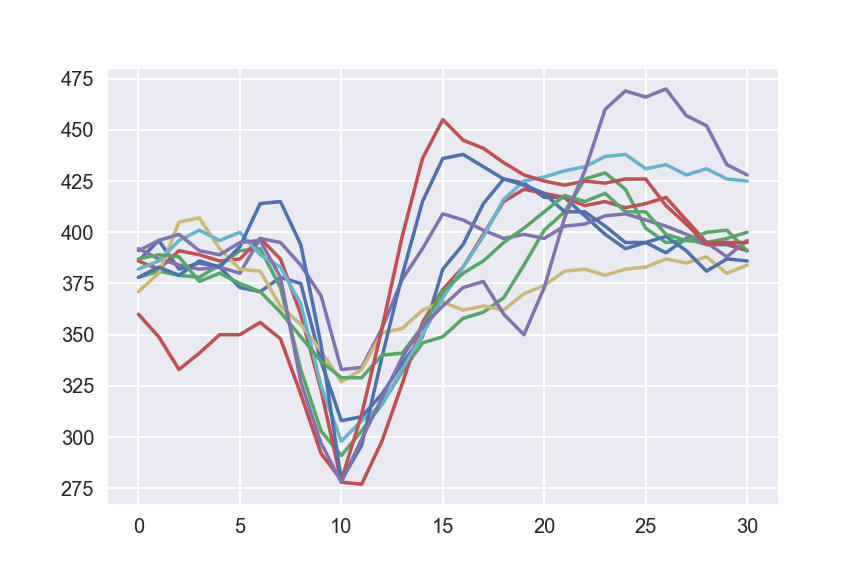

In [14]:
%matplotlib notebook
for i in range(len(cutouts)):
    plt.plot(np.arange(31), cutouts[i])

In [5]:
pca = PCA(n_components=2, whiten=True)
cutouts = pca.fit_transform(cutouts)

In [6]:
cutouts

array([[ 1.13371058,  0.26092588],
       [ 1.44569017,  1.80524398],
       [ 1.77743722,  0.92258922],
       ..., 
       [-0.27823133, -0.29971514],
       [ 0.05444784, -2.2732793 ],
       [-0.64570273, -0.22264799]])

In [10]:
# X = np.hstack((ls, cutouts))
# X
cutouts.shape

(672319, 2)

In [ ]:
ms = MeanShift(bandwidth = 8, bin_seeding=True, min_bin_freq=10, n_jobs=-1)
ms.fit(ls)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

In [ ]:
plt.figure(figsize=(14,5))
# colors = 100*['r', 'g', 'b', 'c', 'k', 'y', 'm']
colors = plt.cm.hsv(1.*np.arange(n_clusters_)/n_clusters_)

for cl in np.unique(labels):
    inds = np.where(labels==cl)[0][:800]
    plt.scatter(ls[inds,0], ls[inds,1], marker='.', color = colors[cl],s=20, alpha=0.6)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="x", color ='k', s=150, linewidths = 5, zorder=10)
plt.axis('equal')
plt.xlim((100,300))